# **Motivación del notebook**

En regresión lineal, el punto de partida natural es **OLS (Ordinary Least Squares)**, porque entrega el mejor ajuste posible (mínimo error cuadrático) **sobre los datos de entrenamiento** dentro de la familia de modelos lineales. Sin embargo, en escenarios reales —especialmente cuando hay **pocos datos**, **muchas variables**, o **variables correlacionadas**— el modelo OLS puede volverse **inestable**: pequeños cambios en los datos pueden producir cambios grandes en los coeficientes, y esto suele afectar la **generalización** (desempeño en datos no vistos).

Este notebook explora esa idea mediante **regularización**, introduciendo **Ridge** (penalización $\ell_2$) y **Lasso** (penalización $\ell_1$). Ambos métodos mantienen la estructura de un modelo lineal, pero modifican el entrenamiento para balancear:

- **calidad de ajuste** (error en entrenamiento) y  
- **complejidad del modelo** (magnitud de los coeficientes).

El objetivo principal es observar, con un experimento reproducible, que:
1. en entrenamiento, OLS suele “ganar” en error cuadrático porque está diseñado para ello;
2. en test (o validación), Ridge/Lasso pueden mejorar el desempeño al reducir varianza;
3. al fijar $\lambda = 0$, Ridge/Lasso deben coincidir con OLS (caso límite que sirve como verificación del código).

En resumen, este notebook conecta la teoría (funciones objetivo y regularización) con una comparación empírica simple, destacando cuándo y por qué un modelo regularizado puede ser preferible a OLS.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Primero vamos a entender el ejercicio de las notas de clase....**

In [2]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 3, 7])

data_small = pd.DataFrame({"x": x, "y": y})

X_small = data_small[["x"]]
y_small = data_small["y"]


In [3]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression().fit(X_small, y_small)
print("R2 (train) =", ols.score(X_small, y_small))
print("coef_      =", ols.coef_)
print("intercept_ =", ols.intercept_)


R2 (train) = 0.7627118644067797
coef_      = [1.5]
intercept_ = 8.881784197001252e-16


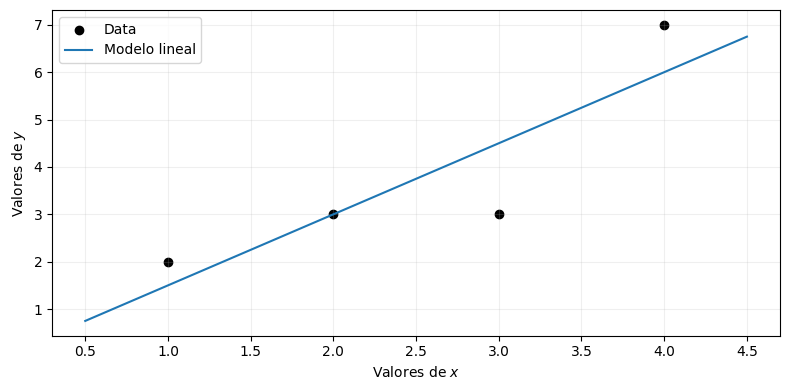

In [4]:
X_line = pd.DataFrame({"x": [0.5, 4.5]})

plt.figure(figsize=(8,4))
plt.scatter(X_small["x"], y_small, label="Data", c="k")
plt.plot(X_line["x"], ols.predict(X_line), label="Modelo lineal")
plt.xlabel(r"Valores de $x$")
plt.ylabel(r"Valores de $y$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("Reg1.png", dpi=200)
plt.show()


In [5]:
from sklearn.linear_model import Ridge

ridge0  = Ridge(alpha=0.0)   # debe coincidir con OLS (sin regularización)
ridge1  = Ridge(alpha=1.0)
ridge2  = Ridge(alpha=2.0)
ridge3  = Ridge(alpha=3.0)
ridge5  = Ridge(alpha=5.0)
ridge10 = Ridge(alpha=10.0)


In [6]:
for m in [ridge0, ridge1, ridge2, ridge3, ridge5, ridge10]:
    m.fit(X_small, y_small)


In [7]:
for alpha, m in [(0, ridge0), (1, ridge1), (2, ridge2), (3, ridge3), (5, ridge5), (10, ridge10)]:
    print(f"Ridge(alpha={alpha}) -> R2(train) = {m.score(X_small, y_small):.6f}")
    print("  intercept_ =", m.intercept_)
    print("  coef_      =", m.coef_)
    print("----")


Ridge(alpha=0) -> R2(train) = 0.762712
  intercept_ = 4.440892098500626e-16
  coef_      = [1.5]
----
Ridge(alpha=1) -> R2(train) = 0.741525
  intercept_ = 0.6249999999999991
  coef_      = [1.25]
----
Ridge(alpha=2) -> R2(train) = 0.700450
  intercept_ = 1.0714285714285716
  coef_      = [1.07142857]
----
Ridge(alpha=3) -> R2(train) = 0.655456
  intercept_ = 1.4062500000000004
  coef_      = [0.9375]
----
Ridge(alpha=5) -> R2(train) = 0.572034
  intercept_ = 1.875
  coef_      = [0.75]
----
Ridge(alpha=10) -> R2(train) = 0.423729
  intercept_ = 2.5
  coef_      = [0.5]
----


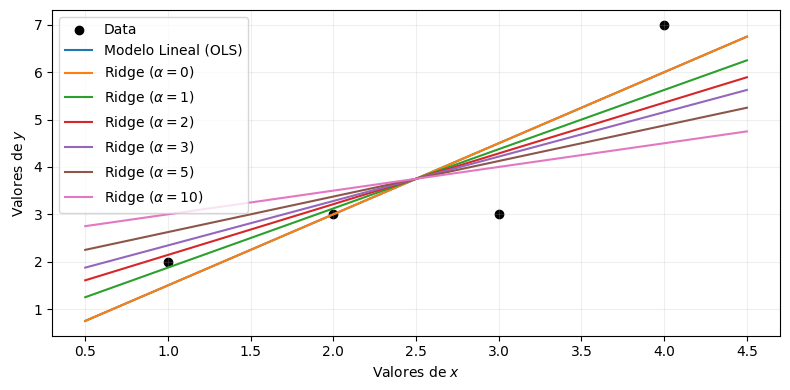

In [8]:
X_line = pd.DataFrame({"x": [0.5, 4.5]})

plt.figure(figsize=(8,4))
plt.scatter(X_small["x"], y_small, label="Data", c="k")
plt.plot(X_line["x"], ols.predict(X_line), label="Modelo Lineal (OLS)")
plt.plot(X_line["x"], ridge0.predict(X_line),  label=r"Ridge ($\alpha=0$)")
plt.plot(X_line["x"], ridge1.predict(X_line),  label=r"Ridge ($\alpha=1$)")
plt.plot(X_line["x"], ridge2.predict(X_line),  label=r"Ridge ($\alpha=2$)")
plt.plot(X_line["x"], ridge3.predict(X_line),  label=r"Ridge ($\alpha=3$)")
plt.plot(X_line["x"], ridge5.predict(X_line),  label=r"Ridge ($\alpha=5$)")
plt.plot(X_line["x"], ridge10.predict(X_line), label=r"Ridge ($\alpha=10$)")

plt.xlabel(r"Valores de $x$")
plt.ylabel(r"Valores de $y$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("Reg2.png", dpi=200)
plt.show()


In [9]:
from sklearn.linear_model import Lasso

# Nota: en scikit-learn, Lasso(alpha=0) no se considera "Lasso" (equivale a OLS).
# Aquí lo manejamos explícitamente usando LinearRegression para el caso alpha=0.

lasso01 = Lasso(alpha=0.1, max_iter=100000)
lasso05 = Lasso(alpha=0.5, max_iter=100000)
lasso075 = Lasso(alpha=0.75, max_iter=100000)
lasso1  = Lasso(alpha=1.0, max_iter=100000)

for m in [lasso01, lasso05, lasso075, lasso1]:
    m.fit(X_small, y_small)


In [10]:
for alpha, m in [(0.1, lasso01), (0.5, lasso05), (0.75, lasso075), (1.0, lasso1)]:
    print(f"Lasso(alpha={alpha}) -> R2(train) = {m.score(X_small, y_small):.6f}")
    print("  intercept_ =", m.intercept_)
    print("  coef_      =", m.coef_)
    print("----")


Lasso(alpha=0.1) -> R2(train) = 0.760542
  intercept_ = 0.20000000000000018
  coef_      = [1.42]
----
Lasso(alpha=0.5) -> R2(train) = 0.708475
  intercept_ = 1.0
  coef_      = [1.1]
----
Lasso(alpha=0.75) -> R2(train) = 0.640678
  intercept_ = 1.5
  coef_      = [0.9]
----
Lasso(alpha=1.0) -> R2(train) = 0.545763
  intercept_ = 2.0
  coef_      = [0.7]
----


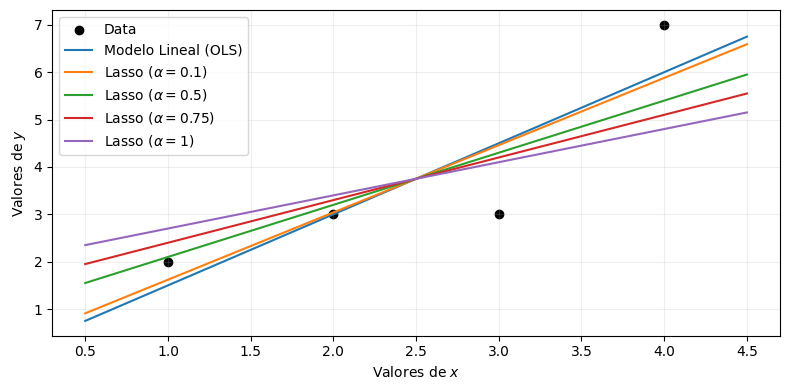

In [11]:
X_line = pd.DataFrame({"x": [0.5, 4.5]})

plt.figure(figsize=(8,4))
plt.scatter(X_small["x"], y_small, label="Data", c="k")
plt.plot(X_line["x"], ols.predict(X_line), label="Modelo Lineal (OLS)")
plt.plot(X_line["x"], lasso01.predict(X_line), label=r"Lasso ($\alpha=0.1$)")
plt.plot(X_line["x"], lasso05.predict(X_line), label=r"Lasso ($\alpha=0.5$)")
plt.plot(X_line["x"], lasso075.predict(X_line), label=r"Lasso ($\alpha=0.75$)")
plt.plot(X_line["x"], lasso1.predict(X_line),  label=r"Lasso ($\alpha=1$)")

plt.xlabel(r"Valores de $x$")
plt.ylabel(r"Valores de $y$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("Reg3.png", dpi=200)
plt.show()


# **Hagamos un ejercicio real.....**

In [12]:
#### With Boston dataset:
#### https://lib.stat.cmu.edu/datasets/boston
path="https://lib.stat.cmu.edu/datasets/boston"

**Variables in order:**
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per tow- 
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        $1000(Bk - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT    \% lower status of the population
- MEDV     Median value of owner-occupied homes in \$1000's

**Variables en rden:**
- CRIM tasa de criminalidad per cápita por municipio
- ZN proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
- INDUS proporción de acres de negocios no minoristas por municipio
- CHAS variable ficticia del río Charles (= 1 si el terreno limita con el río; 0 en caso contrario)
- NOX concentración de óxidos nítricos (partes por 10 millones)
- RM número promedio de habitaciones por vivienda
- AGE proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS distancias ponderadas a cinco centros de empleo de Boston
- RAD índice de accesibilidad a autopistas radiales
- TAX tasa de impuesto predial sobre el valor total por cada \$10,000
- PTRATIO proporción de alumnos por maestro por municipio
- B donde es la proporción de personas de raza negra por municipio
- LSTAT \% de estatus social más bajo de la población
- MEDV valor mediano de las viviendas ocupadas por sus propietarios en miles de \$

In [13]:
names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

try:
    data = pd.read_csv(path, delimiter=r"\s+", skiprows=21, names=names)
except Exception as e:
    raise RuntimeError(
        "No pude cargar el dataset de Boston desde la URL. "
        "Verifica tu conexión a internet o descarga el archivo localmente."
    ) from e

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN


In [14]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,NaN,NaN,NaN
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,NaN,NaN,NaN


In [15]:
data.isnull().sum()

CRIM          0
ZN            0
INDUS         0
CHAS        506
NOX         506
RM          506
AGE         506
DIS         506
RAD         506
TAX         506
PTRATIO     506
B          1012
LSTAT      1012
MEDV       1012
dtype: int64

In [16]:
# Usaremos CRIM (crime rate) como variable objetivo.
# Predictores: el resto de variables numéricas del dataset.

data2 = data.copy()
data2=data2.drop(columns=["B","LSTAT","MEDV"])
data2=data2.dropna()

y_boston = data2["CRIM"]
X_boston = data2.drop(columns=["CRIM"])

print("Shape X:", X_boston.shape)
print("Shape y:", y_boston.shape)


Shape X: (506, 10)
Shape y: (506,)


In [17]:
data2.describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [18]:
data2.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [20]:
def _fit_and_score(model, X, y, scaled=True, test_size=0.2, random_state=42):
    """Ajusta un modelo (con o sin estandarización) y retorna métricas en train/test."""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    if scaled:
        estimator = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model),
        ])
    else:
        estimator = model

    estimator.fit(X_train, y_train)

    pred_train = estimator.predict(X_train)
    pred_test  = estimator.predict(X_test)

    r2_train = r2_score(y_train, pred_train)
    r2_test  = r2_score(y_test, pred_test)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test  = mean_squared_error(y_test, pred_test)

    return r2_train, r2_test, mse_train, mse_test


def make_linear(X, y, scaled=True, printing=True, random_state=42):
    r2_train, r2_test, mse_train, mse_test = _fit_and_score(
        LinearRegression(), X, y, scaled=scaled, random_state=random_state
    )
    if printing:
        print("Model: OLS (LinearRegression)")
        print(f"  R2  train = {r2_train:.6f} | test = {r2_test:.6f}")
        print(f"  MSE train = {mse_train:.6f} | test = {mse_test:.6f}")
    return r2_train, r2_test, mse_train, mse_test


def make_ridge(X, y, lambda0, scaled=True, printing=True, random_state=42):
    # En scikit-learn, Ridge usa el hiperparámetro 'alpha'. Aquí lo llamamos lambda0 por consistencia.
    r2_train, r2_test, mse_train, mse_test = _fit_and_score(
        Ridge(alpha=float(lambda0)), X, y, scaled=scaled, random_state=random_state
    )
    if printing:
        print(f"Model: Ridge(alpha={lambda0})")
        print(f"  R2  train = {r2_train:.6f} | test = {r2_test:.6f}")
        print(f"  MSE train = {mse_train:.6f} | test = {mse_test:.6f}")
    return r2_train, r2_test, mse_train, mse_test


def make_lasso(X, y, lambda0, scaled=True, printing=True, random_state=42):
    # En scikit-learn, Lasso(alpha=0) no se considera Lasso. Para alpha=0 usamos OLS para mostrar la equivalencia.
    if float(lambda0) == 0.0:
        model = LinearRegression()
        name = "Lasso(alpha=0) -> OLS"
    else:
        model = Lasso(alpha=float(lambda0), max_iter=100000)
        name = f"Lasso(alpha={lambda0})"

    r2_train, r2_test, mse_train, mse_test = _fit_and_score(
        model, X, y, scaled=scaled, random_state=random_state
    )
    if printing:
        print(f"Model: {name}")
        print(f"  R2  train = {r2_train:.6f} | test = {r2_test:.6f}")
        print(f"  MSE train = {mse_train:.6f} | test = {mse_test:.6f}")
    return r2_train, r2_test, mse_train, mse_test


In [21]:
# Baseline (OLS) en el dataset real
make_linear(X_boston, y_boston, scaled=True, printing=True)


Model: OLS (LinearRegression)
  R2  train = 0.403372 | test = 0.481988
  MSE train = 46.878105 | test = 28.542587


(0.40337156465722557, 0.4819875368986579, 46.87810537329002, 28.5425874511143)

In [22]:
# Ridge con algunos valores de lambda0 (alpha en scikit-learn)
make_ridge(X_boston, y_boston, lambda0=0, scaled=True, printing=True)


Model: Ridge(alpha=0)
  R2  train = 0.403372 | test = 0.481988
  MSE train = 46.878105 | test = 28.542587


(0.40337156465722557,
 0.48198753689865814,
 46.87810537329002,
 28.542587451114287)

In [23]:
make_ridge(X_boston, y_boston, lambda0=7, scaled=True, printing=True)


Model: Ridge(alpha=7)
  R2  train = 0.402728 | test = 0.483800
  MSE train = 46.928674 | test = 28.442732


(0.40272796554374535,
 0.48379978317110794,
 46.928674044296365,
 28.44273232908755)

In [24]:
# Lasso con algunos valores (nota: alpha=0 se maneja como OLS)
make_lasso(X_boston, y_boston, lambda0=0.1, scaled=True, printing=True)


Model: Lasso(alpha=0.1)
  R2  train = 0.400087 | test = 0.483124
  MSE train = 47.136157 | test = 28.479950


(0.4000872868334061,
 0.48312432470404054,
 47.13615663732626,
 28.479950221974608)

In [25]:
lambdas = np.arange(0, 15, 1, dtype=float)

r2_train_r, r2_test_r, mse_train_r, mse_test_r = [], [], [], []
r2_train_l, r2_test_l, mse_train_l, mse_test_l = [], [], [], []

for lam in lambdas:
    r2tr, r2te, msetr, msete = make_ridge(X_boston, y_boston, lam, scaled=True, printing=False)
    r2_train_r.append(r2tr); r2_test_r.append(r2te); mse_train_r.append(msetr); mse_test_r.append(msete)

    r2tr, r2te, msetr, msete = make_lasso(X_boston, y_boston, lam, scaled=True, printing=False)
    r2_train_l.append(r2tr); r2_test_l.append(r2te); mse_train_l.append(msetr); mse_test_l.append(msete)


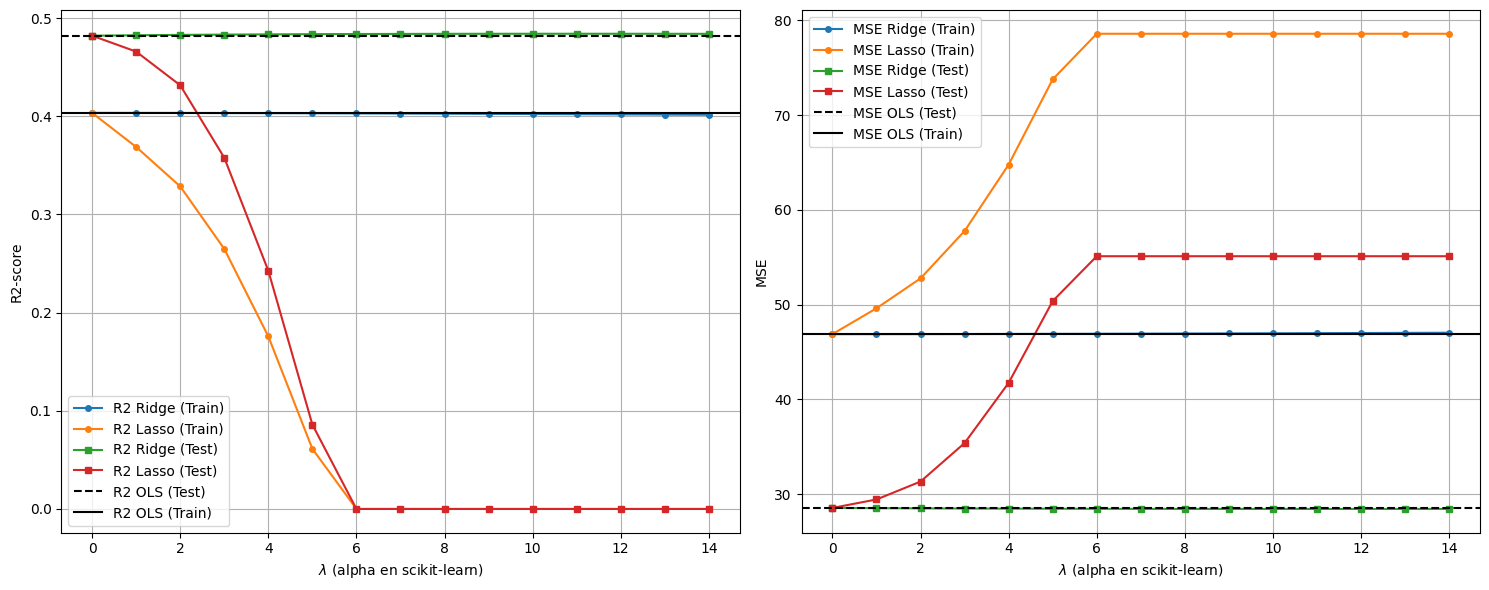

In [26]:
baseline = make_linear(X_boston, y_boston, scaled=True, printing=False)
r2_ols_train, r2_ols_test, mse_ols_train, mse_ols_test = baseline

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(lambdas, r2_train_r, marker="o", markersize=4, label=r"R2 Ridge (Train)")
plt.plot(lambdas, r2_train_l, marker="o", markersize=4, label=r"R2 Lasso (Train)")
plt.plot(lambdas, r2_test_r,  marker="s", markersize=4, label=r"R2 Ridge (Test)")
plt.plot(lambdas, r2_test_l,  marker="s", markersize=4, label=r"R2 Lasso (Test)")
plt.axhline(r2_ols_test,  linestyle="--", c="k", label="R2 OLS (Test)")
plt.axhline(r2_ols_train, linestyle="-",  c="k", label="R2 OLS (Train)")
plt.legend()
plt.grid()
plt.ylabel("R2-score")
plt.xlabel(r"$\lambda$ (alpha en scikit-learn)")

plt.subplot(122)
plt.plot(lambdas, mse_train_r, marker="o", markersize=4, label=r"MSE Ridge (Train)")
plt.plot(lambdas, mse_train_l, marker="o", markersize=4, label=r"MSE Lasso (Train)")
plt.plot(lambdas, mse_test_r,  marker="s", markersize=4, label=r"MSE Ridge (Test)")
plt.plot(lambdas, mse_test_l,  marker="s", markersize=4, label=r"MSE Lasso (Test)")
plt.axhline(mse_ols_test,  linestyle="--", c="k", label="MSE OLS (Test)")
plt.axhline(mse_ols_train, linestyle="-",  c="k", label="MSE OLS (Train)")
plt.legend()
plt.grid()
plt.ylabel("MSE")
plt.xlabel(r"$\lambda$ (alpha en scikit-learn)")

plt.tight_layout()
plt.show()


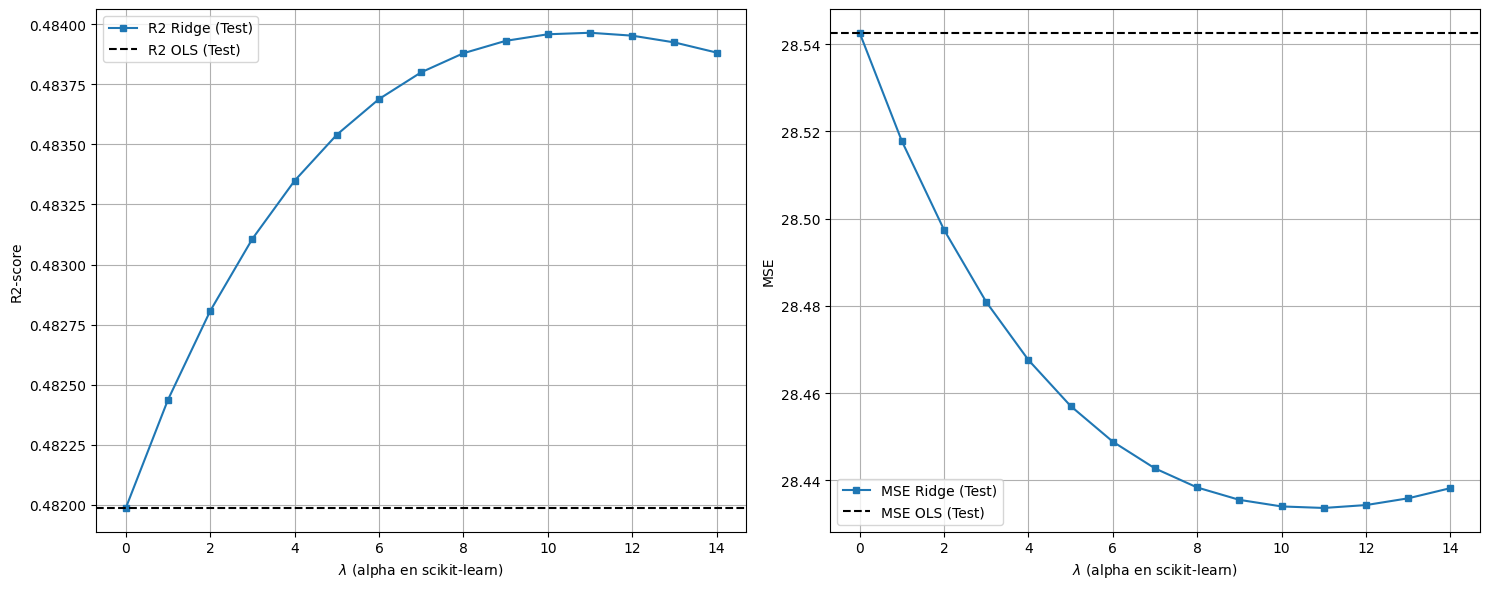

In [27]:
baseline = make_linear(X_boston, y_boston, scaled=True, printing=False)
r2_ols_train, r2_ols_test, mse_ols_train, mse_ols_test = baseline

plt.figure(figsize=(15,6))

plt.subplot(121)
#plt.plot(lambdas, r2_train_r, marker="o", markersize=4, label=r"R2 Ridge (Train)")
#plt.plot(lambdas, r2_train_l, marker="o", markersize=4, label=r"R2 Lasso (Train)")
plt.plot(lambdas, r2_test_r,  marker="s", markersize=4, label=r"R2 Ridge (Test)")
#plt.plot(lambdas, r2_test_l,  marker="s", markersize=4, label=r"R2 Lasso (Test)")
plt.axhline(r2_ols_test,  linestyle="--", c="k", label="R2 OLS (Test)")
#plt.axhline(r2_ols_train, linestyle="-",  c="k", label="R2 OLS (Train)")
plt.legend()
plt.grid()
plt.ylabel("R2-score")
plt.xlabel(r"$\lambda$ (alpha en scikit-learn)")

plt.subplot(122)
#plt.plot(lambdas, mse_train_r, marker="o", markersize=4, label=r"MSE Ridge (Train)")
#plt.plot(lambdas, mse_train_l, marker="o", markersize=4, label=r"MSE Lasso (Train)")
plt.plot(lambdas, mse_test_r,  marker="s", markersize=4, label=r"MSE Ridge (Test)")
#plt.plot(lambdas, mse_test_l,  marker="s", markersize=4, label=r"MSE Lasso (Test)")
plt.axhline(mse_ols_test,  linestyle="--", c="k", label="MSE OLS (Test)")
#plt.axhline(mse_ols_train, linestyle="-",  c="k", label="MSE OLS (Train)")
plt.legend()
plt.grid()
plt.ylabel("MSE")
plt.xlabel(r"$\lambda$ (alpha en scikit-learn)")

plt.tight_layout()
plt.show()
